In [246]:
# !pip install imbalanced-learn scikit-learn

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

In [256]:

dataset=pd.read_csv('assets\Salary_Dataset_with_Extra_Features.csv') #Cargamos el dataset
dataset.head() #Mostramos las primeras 5 filas del dataset

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [257]:
dataset.info() #Mostramos las columnas del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


<h1>Tabulares</h1>

In [250]:
#Obtener columas del dataset que son de tipo numerico
columns=dataset.select_dtypes(include=['int64','float64']).columns
numeric_dataset=dataset[columns] #Obtenemos las columnas numericas del dataset y creamos un nuevo dataset

                           Media      Moda  Mínimo      Máximo  \
Rating                  3.918213       4.0     1.0         5.0   
Salary             695387.211243  300000.0  2112.0  90000000.0   
Salaries Reported       1.855775       1.0     1.0       361.0   

                   Desviación Estándar  Datos Faltantes  
Rating                        0.519675                0  
Salary                   884399.013676                0  
Salaries Reported             6.823668                0  
Job Roles


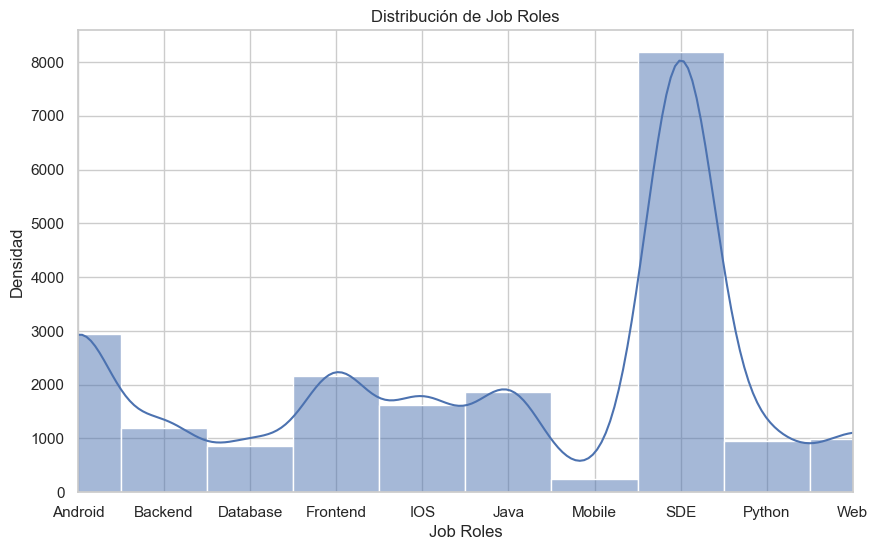

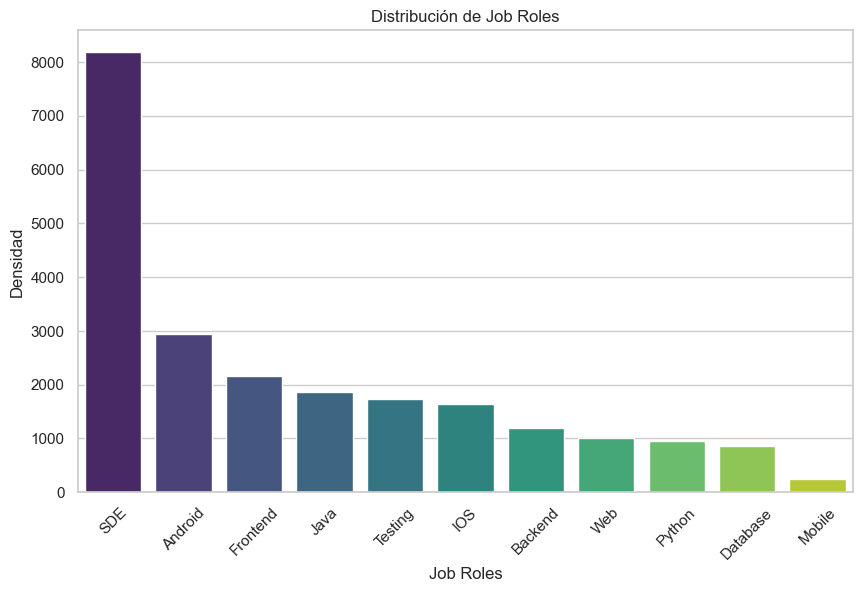

In [251]:
from utils.numeric_stats import get_numpy_distribucions,get_numpy_barChart, getNumericStats#Importamos el modulo numeric_stats.py
print(getNumericStats(numeric_dataset)) #Obtenemos las estadisticas de las columnas numericas del dataset
get_numpy_distribucions(dataset[["Job Roles"]]) #Obtenemos la distribucion de la columna Salary
get_numpy_barChart(dataset[["Job Roles"]])


In [252]:
numeric_dataset["Rating"].value_counts().sort_values(ascending=False) #Obtenemos el numero de registros de cada columna

Rating
4.00    2895
3.90    2473
3.80    2471
4.10    2111
3.70    1479
4.20    1323
4.30    1294
3.60    1009
4.40     883
4.50     861
3.50     801
3.30     727
5.00     672
3.40     574
4.60     464
4.70     401
3.00     333
3.10     329
3.20     316
4.80     283
2.90     177
4.90     157
2.80     129
2.70      98
2.60      77
1.00      67
2.50      66
2.00      54
2.40      53
2.30      43
2.20      43
3.95      27
2.10      15
1.90      15
1.80      12
3.85      11
1.50       8
1.60       8
1.40       5
1.70       4
1.30       2
Name: count, dtype: int64

<h1>Categoricos</h1>

In [253]:
columnsCategorical=dataset.select_dtypes(exclude=['int64','float64']).columns
categorical_dataset=dataset[columnsCategorical] #Obtenemos las columnas numericas del dataset y creamos un nuevo dataset
categorical_dataset.head()

,Company Name,Job Title,Location,Employment Status,Job Roles
0,Sasken,Android Developer,Bangalore,Full Time,Android
1,Advanced Millennium Technologies,Android Developer,Bangalore,Full Time,Android
2,Unacademy,Android Developer,Bangalore,Full Time,Android
3,SnapBizz Cloudtech,Android Developer,Bangalore,Full Time,Android
4,Appoids Tech Solutions,Android Developer,Bangalore,Full Time,Android


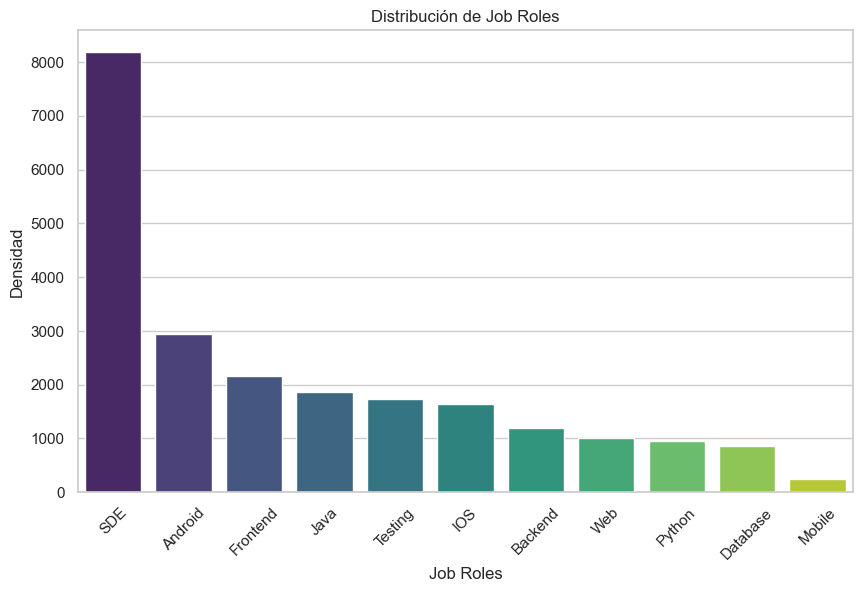

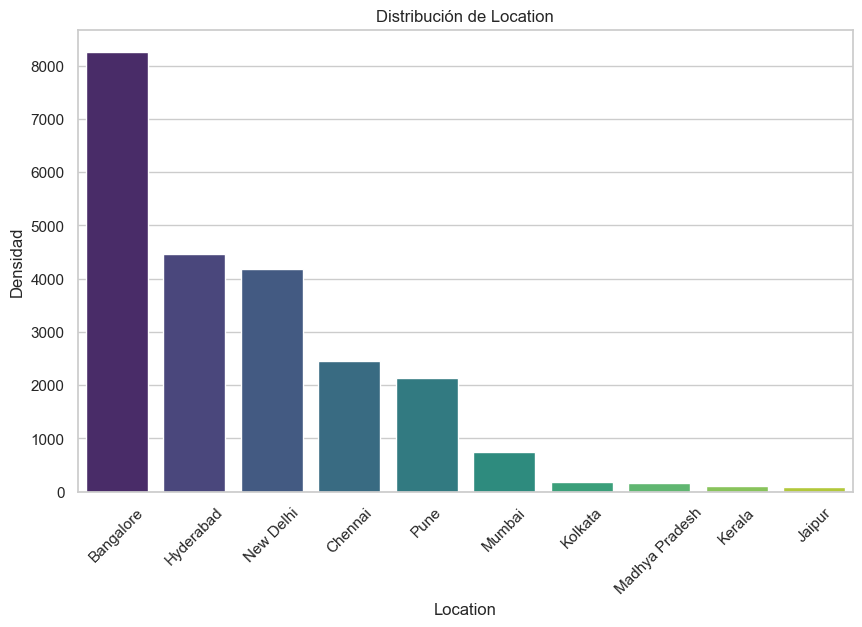

In [259]:
from utils.numeric_stats import get_numpy_barChart#Importamos el modulo numeric_stats.py

_dataset=dataset[["Job Roles","Location"]]
get_numpy_barChart(_dataset) #Obtenemos las estadisticas de las columnas numericas del dataset


In [260]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Seleccionar datos

In [274]:
X = dataset.drop('Job Roles', axis=1) #Obtenemos todas las columnas menos la columna Job Roles
y = dataset['Job Roles']
y.shape

(22770,)

Obtenemos datos de clase seleccionada

Codificamos X

In [382]:
clases=X.columns
print(clases)
encoder = OneHotEncoder()
X_coded = encoder.fit_transform(X).toarray() 
print(X_coded.shape)
x_decodificado = pd.DataFrame(X_coded, columns=encoder.get_feature_names_out(input_features=clases))
print(x_decodificado.shape)
x_decodificado

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status'],
      dtype='object')
(22770, 12794)
(22770, 12794)


,Rating_1.0,Rating_1.3,Rating_1.4,Rating_1.5,Rating_1.6,Rating_1.7,Rating_1.8,Rating_1.9,Rating_2.0,Rating_2.1,...,Location_Kerala,Location_Kolkata,Location_Madhya Pradesh,Location_Mumbai,Location_New Delhi,Location_Pune,Employment Status_Contractor,Employment Status_Full Time,Employment Status_Intern,Employment Status_Trainee
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Codificamos la clase seleccionada

In [342]:
location=dataset[["Location"]]


In [383]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categoricas_encoded = encoder.fit(location)
etiquetas_codificadas = encoder.transform(location)
y_decodificado = pd.DataFrame(etiquetas_codificadas)
y_decodificado.shape

c:\Users\carlo\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\carlo\anaconda3\envs\tensor\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


(22770, 1)

In [384]:
y_decodificado[0]

0        0
1        0
2        0
3        0
4        0
        ..
22765    0
22766    0
22767    0
22768    0
22769    0
Name: 0, Length: 22770, dtype: int32

In [386]:
x_decodificado.v

Rating_1.0                      float64
Rating_1.3                      float64
Rating_1.4                      float64
Rating_1.5                      float64
Rating_1.6                      float64
                                 ...   
Location_Pune                   float64
Employment Status_Contractor    float64
Employment Status_Full Time     float64
Employment Status_Intern        float64
Employment Status_Trainee       float64
Length: 12794, dtype: object

<h1>SMOTE</h1>
Synthetic Minority Over-sampling Technique

In [390]:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)


# Aplicar SMOTE a tus datos
X_resampled, y_resampled = smote.fit_resample(x_decodificado.values, y_decodificado.values)



In [392]:
X_resampled.shape

(82640, 12794)

In [394]:
pd.DataFrame(X_resampled)

,0,1,2,3,4,5,6,7,8,9,...,12784,12785,12786,12787,12788,12789,12790,12791,12792,12793
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
82636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
82637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
82638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [393]:
y_resampled.shape

(82640,)

In [395]:
ubicacion_original = encoder.inverse_transform(X_resampled)

ValueError: y should be a 1d array, got an array of shape (82640, 12794) instead.